<a href="https://colab.research.google.com/github/youtube-jocoding/pyupbit-autotrade/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install pyupbit

In [15]:
import pyupbit

In [16]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-11-19 17:00:00,69850000.0,71500000.0,69804000.0,70955000.0,727.467770,5.158217e+10
2021-11-19 18:00:00,70963000.0,71502000.0,70904000.0,70948000.0,374.114230,2.664024e+10
2021-11-19 19:00:00,70911000.0,70970000.0,70600000.0,70896000.0,274.105810,1.939446e+10
2021-11-19 20:00:00,70900000.0,71150000.0,70670000.0,71048000.0,236.273539,1.675207e+10
2021-11-19 21:00:00,71048000.0,71495000.0,70994000.0,71015000.0,341.967987,2.438072e+10
...,...,...,...,...,...,...
2021-11-27 20:00:00,69558000.0,69750000.0,69420000.0,69449000.0,127.164096,8.846207e+09
2021-11-27 21:00:00,69450000.0,69578000.0,69312000.0,69500000.0,191.875908,1.332503e+10
2021-11-27 22:00:00,69500000.0,69909000.0,69440000.0,69786000.0,171.797537,1.197648e+10
2021-11-27 23:00:00,69784000.0,69933000.0,69520000.0,69530000.0,154.746407,1.078925e+10


In [17]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-11-19 17:00:00,70955000.0
1,2021-11-19 18:00:00,70948000.0
2,2021-11-19 19:00:00,70896000.0
3,2021-11-19 20:00:00,71048000.0
4,2021-11-19 21:00:00,71015000.0
...,...,...
195,2021-11-27 20:00:00,69449000.0
196,2021-11-27 21:00:00,69500000.0
197,2021-11-27 22:00:00,69786000.0
198,2021-11-27 23:00:00,69530000.0


In [18]:
#prophet 불러옴
from fbprophet import Prophet

In [19]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [20]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=72, freq='H')
forecast = model.predict(future)

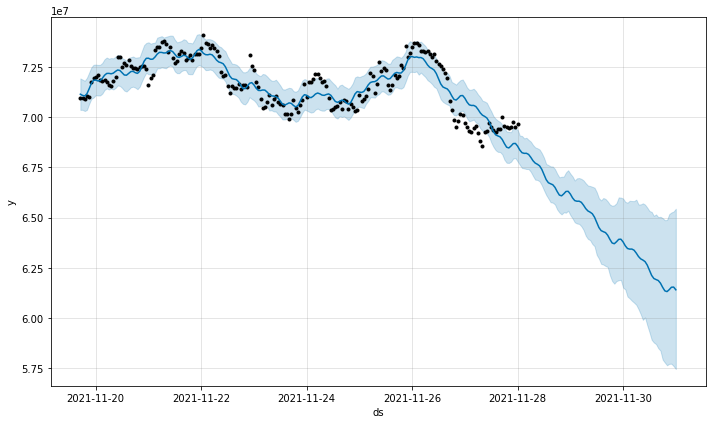

In [21]:
#그래프1
fig1 = model.plot(forecast)

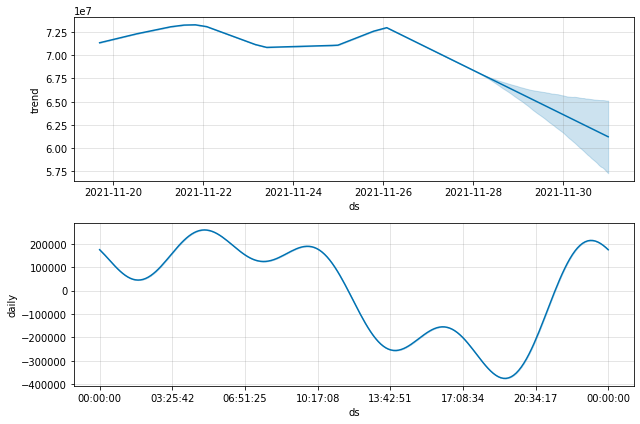

In [22]:
#그래프2
fig2 = model.plot_components(forecast)

In [23]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

69729000.0

In [24]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

67659986.88649571

In [25]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  69729000.0
종가의 가격:  67659986.88649571


In [26]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-19 17:00:00,7.133835e+07,7.036701e+07,7.193570e+07,7.133835e+07,7.133835e+07,-188310.240360,-188310.240360,-188310.240360,-188310.240360,-188310.240360,-188310.240360,0.0,0.0,0.0,7.115004e+07
1,2021-11-19 18:00:00,7.138726e+07,7.037325e+07,7.187743e+07,7.138726e+07,7.138726e+07,-296545.905964,-296545.905964,-296545.905964,-296545.905964,-296545.905964,-296545.905964,0.0,0.0,0.0,7.109071e+07
2,2021-11-19 19:00:00,7.143616e+07,7.031181e+07,7.181817e+07,7.143616e+07,7.143616e+07,-373679.241175,-373679.241175,-373679.241175,-373679.241175,-373679.241175,-373679.241175,0.0,0.0,0.0,7.106248e+07
3,2021-11-19 20:00:00,7.148506e+07,7.036955e+07,7.196837e+07,7.148506e+07,7.148506e+07,-312964.952010,-312964.952010,-312964.952010,-312964.952010,-312964.952010,-312964.952010,0.0,0.0,0.0,7.117210e+07
4,2021-11-19 21:00:00,7.153397e+07,7.066704e+07,7.222438e+07,7.153397e+07,7.153397e+07,-115036.601757,-115036.601757,-115036.601757,-115036.601757,-115036.601757,-115036.601757,0.0,0.0,0.0,7.141893e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2021-11-30 20:00:00,6.163055e+07,5.764831e+07,6.488404e+07,5.802961e+07,6.517659e+07,-312964.952015,-312964.952015,-312964.952015,-312964.952015,-312964.952015,-312964.952015,0.0,0.0,0.0,6.131759e+07
268,2021-11-30 21:00:00,6.153118e+07,5.772131e+07,6.517927e+07,5.792946e+07,6.517886e+07,-115036.601765,-115036.601765,-115036.601765,-115036.601765,-115036.601765,-115036.601765,0.0,0.0,0.0,6.141614e+07
269,2021-11-30 22:00:00,6.143180e+07,5.772586e+07,6.525996e+07,5.774607e+07,6.515933e+07,103747.524173,103747.524173,103747.524173,103747.524173,103747.524173,103747.524173,0.0,0.0,0.0,6.153555e+07
270,2021-11-30 23:00:00,6.133242e+07,5.760931e+07,6.530764e+07,5.752412e+07,6.512329e+07,211384.708383,211384.708383,211384.708383,211384.708383,211384.708383,211384.708383,0.0,0.0,0.0,6.154381e+07
